## File to Create Final Output Plots for quantitative and qualitative analyis

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

os.chdir("..")
print(os.getcwd())

/Users/luca/Library/CloudStorage/OneDrive-Personal/Dokumente/17_EPFL/Visual Intelligence/Project/dit-editor


## IF LOADING FROM THE DATA PLAYGROUND NOTEBOOK

In [2]:
# load scores
scores = pd.read_csv('scores.csv')
scores

,image_index,model_type,category,hpsv2_score,aesthetics_score,background_mse,clip_text_image,dinov2_similarity
0,0,Photoshop,Real-Sketch,0.381118,5.469848,0.000620,0.345759,0.064891
1,0,TF-ICON,Real-Sketch,0.426673,5.660169,0.008525,0.322444,0.058594
2,1,Photoshop,Real-Sketch,0.379129,5.508402,0.003419,0.310391,0.179352
3,1,TF-ICON,Real-Sketch,0.396661,5.580972,0.011822,0.303254,0.103354
4,2,Photoshop,Real-Sketch,0.323486,5.447720,0.000398,0.224001,0.263948
...,...,...,...,...,...,...,...,...
961,325,KV-EDIT,Real-Painting,0.270653,5.469880,0.001416,0.198039,0.381849
962,326,KV-EDIT,Real-Painting,0.397896,6.280664,0.001851,0.307755,0.053751
963,327,KV-EDIT,Real-Painting,0.363019,6.038017,0.001833,0.297876,0.198488
964,328,KV-EDIT,Real-Painting,0.330587,5.709903,0.001897,0.284875,0.086918


In [3]:
scores_flat = pd.melt(scores, id_vars=['model_type', 'image_index', "category"], 
                      var_name='metric', 
                      value_name='value')
scores_flat

,model_type,image_index,category,metric,value
0,Photoshop,0,Real-Sketch,hpsv2_score,0.381118
1,TF-ICON,0,Real-Sketch,hpsv2_score,0.426673
2,Photoshop,1,Real-Sketch,hpsv2_score,0.379129
3,TF-ICON,1,Real-Sketch,hpsv2_score,0.396661
4,Photoshop,2,Real-Sketch,hpsv2_score,0.323486
...,...,...,...,...,...
4825,KV-EDIT,325,Real-Painting,dinov2_similarity,0.381849
4826,KV-EDIT,326,Real-Painting,dinov2_similarity,0.053751
4827,KV-EDIT,327,Real-Painting,dinov2_similarity,0.198488
4828,KV-EDIT,328,Real-Painting,dinov2_similarity,0.086918


## IF LOADING FROM THE RUN_AGGREGATE_METRICS

In [9]:
scores = pd.read_csv("aggregated_scores.csv")
scores.columns = ['category', 'metric', 'Photoshop', 'TF-ICON', "KV-EDIT", "ours"]
display(scores)
scores_flat = pd.melt(scores, id_vars=['metric', 'category'],
                      var_name='model_type', 
                      value_name='value')
scores_flat

,category,metric,Photoshop,TF-ICON,KV-EDIT,ours
0,Real-Cartoon,hpsv2_score,0.315157,0.347358,0.305713,0.351154
1,Real-Cartoon,hpsv2_score,0.297158,0.345494,0.300157,0.344238
2,Real-Cartoon,hpsv2_score,0.255658,0.254265,0.311356,0.268855
3,Real-Cartoon,hpsv2_score,0.300372,0.349126,0.312903,0.331529
4,Real-Cartoon,hpsv2_score,0.339461,0.342188,0.393923,0.393576
...,...,...,...,...,...,...
1605,Real-Painting,dinov2_similarity,0.208810,0.180722,0.116530,0.229511
1606,Real-Painting,dinov2_similarity,0.092689,0.081104,0.036014,0.099995
1607,Real-Painting,dinov2_similarity,0.245466,0.270924,0.169172,0.206862
1608,Real-Painting,dinov2_similarity,0.299760,0.350105,0.198488,0.328871


,metric,category,model_type,value
0,hpsv2_score,Real-Cartoon,Photoshop,0.315157
1,hpsv2_score,Real-Cartoon,Photoshop,0.297158
2,hpsv2_score,Real-Cartoon,Photoshop,0.255658
3,hpsv2_score,Real-Cartoon,Photoshop,0.300372
4,hpsv2_score,Real-Cartoon,Photoshop,0.339461
...,...,...,...,...
6435,dinov2_similarity,Real-Painting,ours,0.229511
6436,dinov2_similarity,Real-Painting,ours,0.099995
6437,dinov2_similarity,Real-Painting,ours,0.206862
6438,dinov2_similarity,Real-Painting,ours,0.328871


## Latex / Plotting Formatting

In [10]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4

import matplotlib.font_manager as fm
print(sorted(fm.get_font_names()))
import matplotlib.pyplot as plt
import json
# Use LaTeX font for publication
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["cm10"],
    "font.size": 12,
})
plt.rc('text.latex', preamble=r'\usepackage{amsmath,bm}')
percent_formatter = plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x))

import matplotlib.pyplot as plt

# # Global settings for LaTeX-like fonts
plt.rcParams['text.usetex'] = True  # Disable full LaTeX rendering to avoid dependency issues
plt.rcParams['mathtext.fontset'] = 'cm'  # Use Computer Modern (LaTeX-like) fonts
plt.rcParams['font.family'] = 'serif'  # Set overall font to serif (LaTeX-style)
# Set the color for axes edges (spines)
plt.rcParams['axes.edgecolor'] = 'darkgray'
# Enable the grid for the y-axis only
plt.rcParams['axes.grid'] = False  # Enable grid
plt.rcParams['grid.linestyle'] = '--'  # Optional: Set grid line style
plt.rcParams['grid.color'] = 'lightgray'  # Optional: Set grid line color
# # Disable LaTeX rendering to avoid dependency issues
# # plt.rcParams['text.usetex'] = False
# # Use 'DejaVu Serif' or another font that's available on your system
# # plt.rcParams['font.family'] = 'serif'
# # plt.rcParams['font.family'] = 'cmr10'
# # plt.rcParams['font.family'] = 'cmss10'
# # plt.rcParams['formatter.use_mathtext'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

['.Aqua Kana', '.Keyboard', '.New York', '.SF Arabic', '.SF Arabic Rounded', '.SF Armenian', '.SF Armenian Rounded', '.SF Camera', '.SF Compact', '.SF Compact Rounded', '.SF Georgian', '.SF Georgian Rounded', '.SF Hebrew', '.SF Hebrew Rounded', '.SF NS Mono', '.SF NS Rounded', '.SF Soft Numeric', '.ThonburiUI', 'Academy Engraved LET', 'Adelle Sans Devanagari', 'AkayaKanadaka', 'AkayaTelivigala', 'Al Bayan', 'Al Nile', 'Al Tarikh', 'American Typewriter', 'Andale Mono', 'Annai MN', 'Apple Braille', 'Apple Chancery', 'Apple LiGothic', 'Apple LiSung', 'Apple SD Gothic Neo', 'Apple Symbols', 'AppleGothic', 'AppleMyungjo', 'Arial', 'Arial Black', 'Arial Hebrew', 'Arial Narrow', 'Arial Rounded MT Bold', 'Arial Unicode MS', 'Arima Koshi', 'Arima Madurai', 'Athelas', 'Avenir', 'Avenir Next', 'Avenir Next Condensed', 'Ayuthaya', 'BM Dohyeon', 'BM Hanna 11yrs Old', 'BM Hanna Air', 'BM Hanna Pro', 'BM Jua', 'BM Kirang Haerang', 'BM Yeonsung', 'Baghdad', 'Bai Jamjuree', 'Baloo 2', 'Baloo Bhai 2', '

# Aggregated analyis
Metrics aggregated over all image / task categories

Print out Mean + std table

In [11]:
from scipy import stats

# create mean and std table for metrics across model_types with statistical significance
def create_mean_std_table(scores_flat, group_by=['metric', "model_type", 'category']):
    mean_std_table = scores_flat.groupby(group_by).agg(
        mean=('value', 'mean'),
        std=('value', 'std')
    ).reset_index()
    return mean_std_table

mean_std_table = create_mean_std_table(scores_flat, group_by=['metric', "model_type"])

# Add statistical significance testing

# Create a new dataframe to store significance results
significance_results = []

for metric in scores_flat['metric'].unique():
    # Get data for Photoshop and TF-ICON for this metric
    photoshop_data = scores_flat[(scores_flat['metric'] == metric) & 
                                 (scores_flat['model_type'] == 'Photoshop')]['value']
    tficon_data = scores_flat[(scores_flat['metric'] == metric) & 
                              (scores_flat['model_type'] == 'TF-ICON')]['value']
    
    # Perform t-test
    t_stat, p_value = stats.ttest_ind(photoshop_data, tficon_data, equal_var=False)
    
    # Determine if difference is significant (p < 0.05)
    is_significant = p_value < 0.05
    
    # Add to results
    significance_results.append({
        'metric': metric,
        'p_value': p_value,
        'is_significant': is_significant
    })

# Convert to DataFrame
significance_df = pd.DataFrame(significance_results)

# Display the original mean_std_table
display(mean_std_table)

# Display significance results
print("\nStatistical Significance (p < 0.05):")
significance_df.sort_values('metric')

,metric,model_type,mean,std
0,aesthetics_score,KV-EDIT,5.254556,0.511538
1,aesthetics_score,Photoshop,5.207441,0.373897
2,aesthetics_score,TF-ICON,5.660486,0.404525
3,aesthetics_score,ours,5.439274,0.433036
4,background_mse,KV-EDIT,0.002333,0.002260
5,background_mse,Photoshop,0.001043,0.000669
6,background_mse,TF-ICON,0.009723,0.006253
7,background_mse,ours,0.004930,0.004262
8,clip_text_image,KV-EDIT,0.239139,0.057674
9,clip_text_image,Photoshop,0.269635,0.051602



Statistical Significance (p < 0.05):


,metric,p_value,is_significant
1,aesthetics_score,1.271766e-42,True
2,background_mse,4.079448e-77,True
3,clip_text_image,1.099236e-01,False
4,dinov2_similarity,4.406200e-01,False
0,hpsv2_score,3.813651e-07,True


Plot Metrics for all our model types

/var/folders/l7/k9q4xx6n4lx0nfwlg_qh8wl00000gn/T/ipykernel_4135/1406174100.py:1: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=scores_flat, x='metric', y='value', hue='model_type',


<Axes: xlabel='metric', ylabel='value'>

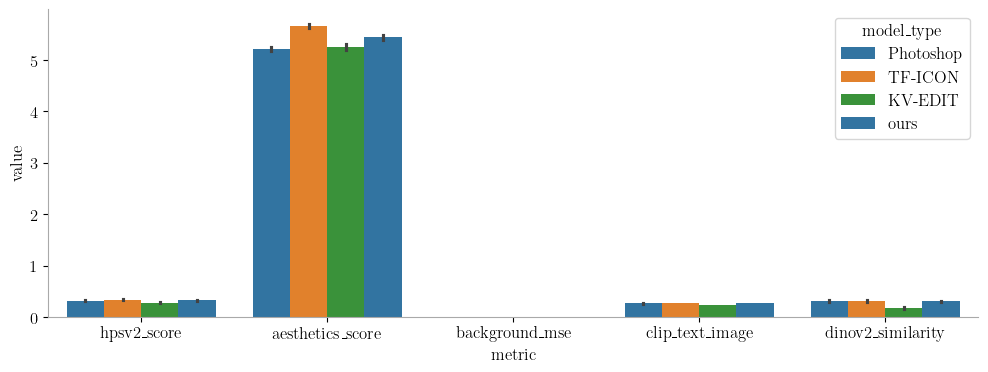

In [12]:
sns.barplot(data=scores_flat, x='metric', y='value', hue='model_type',
            palette=['#1f77b4', '#ff7f0e', '#2ca02c'], dodge=True, linewidth=0.5)

Boxplot for each metric independently

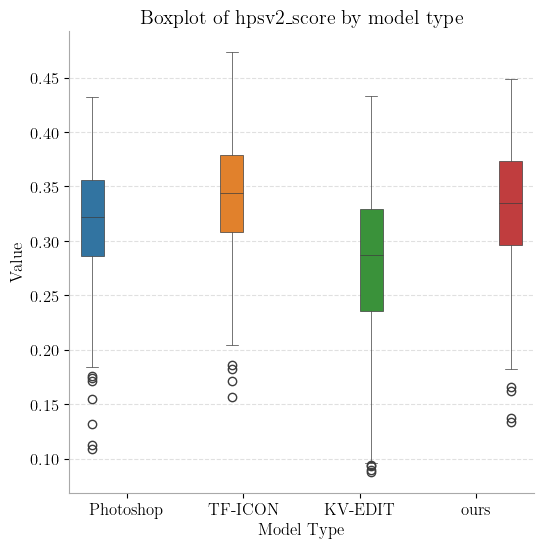

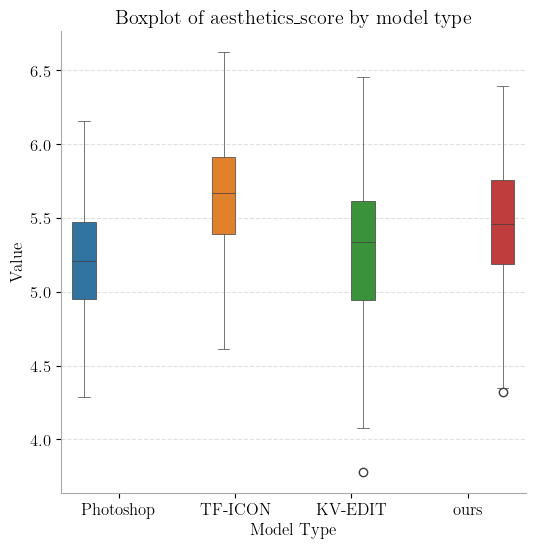

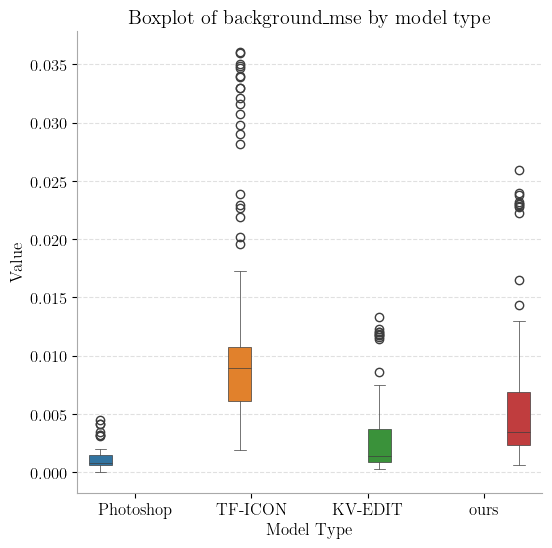

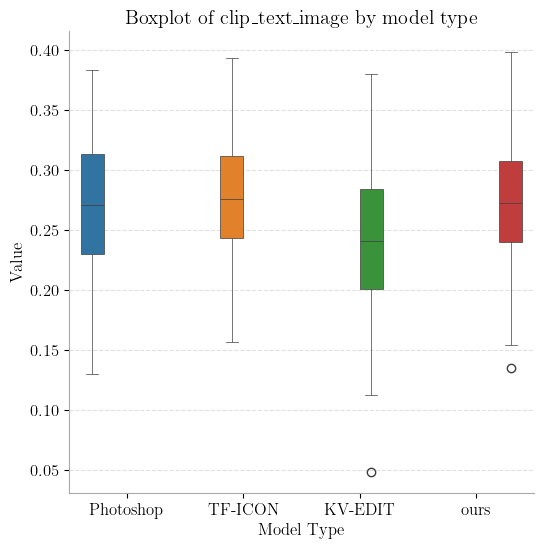

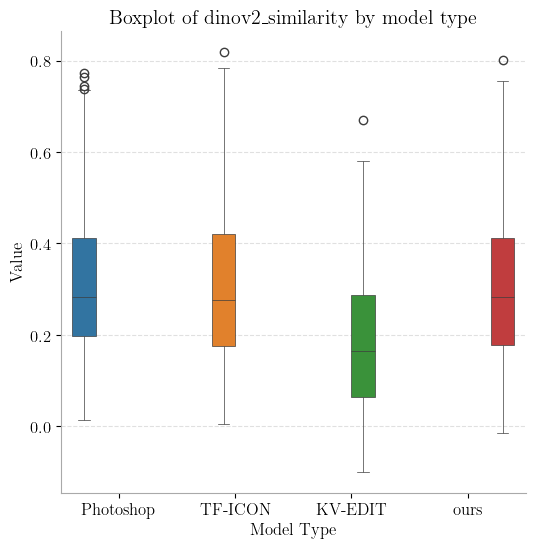

In [13]:
for metric in scores_flat['metric'].unique():
    plt.figure(figsize=(6, 6))
    sns.boxplot(data=scores_flat[scores_flat['metric'] == metric], x='model_type', 
                    y='value', hue='model_type',
                    dodge=True, linewidth=0.5)
    plt.title(f'Boxplot of {metric} by model type')
    plt.ylabel('Value')
    plt.xlabel('Model Type')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    # plt.savefig(f'boxplot_{metric}.pdf')
    plt.show()

Same as above but in one plot

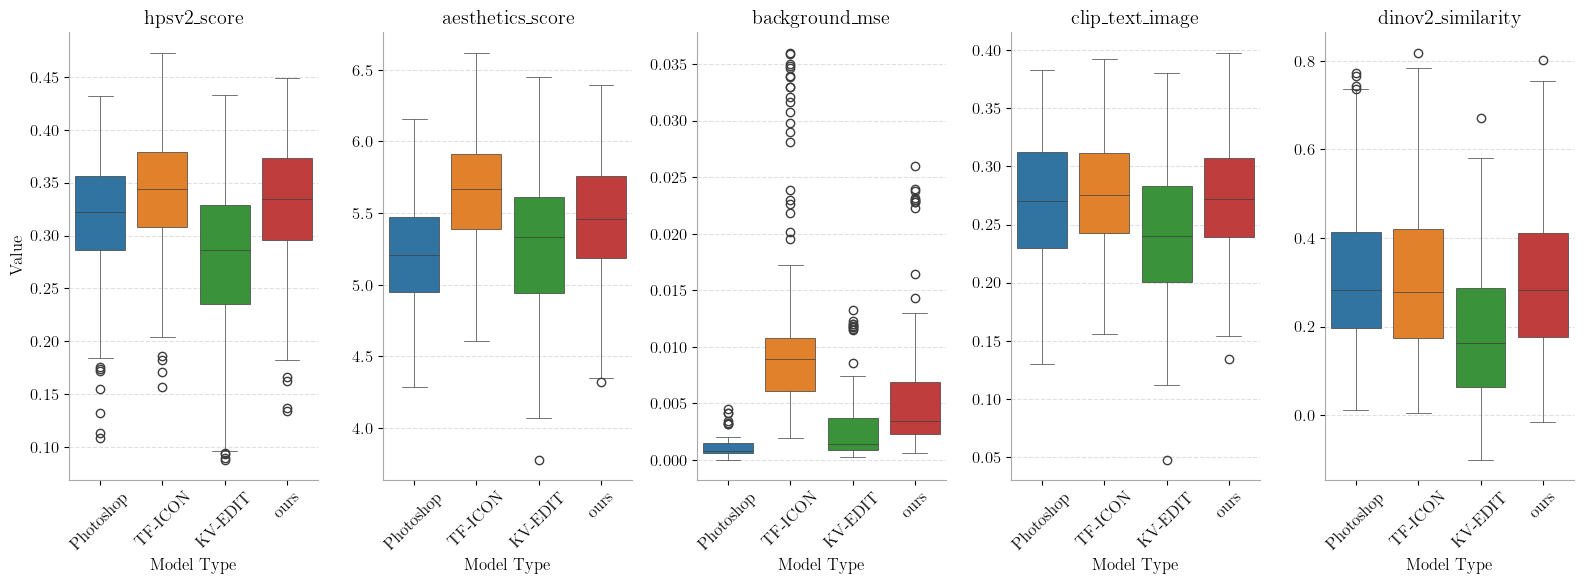

In [14]:
metrics = scores_flat['metric'].unique()
num_metrics = len(metrics)

fig, axes = plt.subplots(1, num_metrics, figsize=(16, 6), sharey=False)

for i, metric in enumerate(metrics):
    ax = axes[i]
    sns.boxplot(data=scores_flat[scores_flat['metric'] == metric], 
                x='model_type', y='value', 
                hue="model_type",
                ax=ax, linewidth=0.5)
    ax.set_title(f'{metric}')
    ax.set_ylabel('Value' if i == 0 else '')
    ax.set_xlabel('Model Type')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Rotate the x-axis labels if needed
    ax.tick_params(axis='x', rotation=45)
    
plt.tight_layout()
# plt.savefig('all_metrics_boxplot.pdf', bbox_inches='tight')
plt.show()

## Disaggregated analysis across categories

Grouped table

In [19]:
mean_std_table = create_mean_std_table(scores_flat, group_by=['metric', "model_type", "category"])
mean_std_table

,metric,model_type,category,mean,std
0,aesthetics_score,KV-EDIT,Real-Cartoon,5.616305,0.336958
1,aesthetics_score,KV-EDIT,Real-Painting,5.729034,0.306065
2,aesthetics_score,KV-EDIT,Real-Real,5.113362,0.506144
3,aesthetics_score,KV-EDIT,Real-Sketch,5.426935,0.289142
4,aesthetics_score,Photoshop,Real-Cartoon,5.411798,0.326947
...,...,...,...,...,...
75,hpsv2_score,TF-ICON,Real-Sketch,0.360337,0.050321
76,hpsv2_score,ours,Real-Cartoon,0.356467,0.047670
77,hpsv2_score,ours,Real-Painting,0.337542,0.064006
78,hpsv2_score,ours,Real-Real,0.323489,0.054542


Display as tables


In [23]:
def create_performance_tables(mean_std_table):
    """
    Create formatted tables of model performance for each category.
    
    Parameters:
    -----------
    mean_std_table : pandas.DataFrame
        DataFrame containing 'metric', 'model_type', 'category', 'mean', and 'std' columns
    """
    # Get unique categories and metrics
    categories = mean_std_table['category'].unique()
    metrics = sorted(mean_std_table['metric'].unique())
    model_types = sorted(mean_std_table['model_type'].unique())
    
    # Process each category
    for category in categories:
        # Create a DataFrame for this category with models as rows and metrics as columns
        category_data = mean_std_table[mean_std_table['category'] == category]
        
        # Initialize the result DataFrame
        result_df = pd.DataFrame(index=model_types, columns=metrics)
        
        # Fill the DataFrame with formatted mean ± std values
        for _, row in category_data.iterrows():
            metric = row['metric']
            model = row['model_type']
            mean_val = row['mean']
            std_val = row['std']
            
            # Format the values with 3 decimal places
            result_df.at[model, metric] = f"{mean_val:.3f} ± {std_val:.3f}"
        
        # Find best performing model for each metric
        best_models = {}
        for metric in metrics:
            metric_data = category_data[category_data['metric'] == metric]
            if metric in ['background_mse']:  # Lower is better for MSE
                best_model = metric_data.loc[metric_data['mean'].idxmin()]['model_type']
            else:  # Higher is better for other metrics
                best_model = metric_data.loc[metric_data['mean'].idxmax()]['model_type']
            best_models[metric] = best_model
        
        # Display the table with appropriate styling
        print(f"\n{'='*80}")
        print(f"Performance for category: {category}")
        print(f"{'='*80}")
        
        # Create a styled DataFrame with highlighting for the best model in each metric
        styled_df = result_df.copy()
        
        # Function to highlight the best model for each metric
        def highlight_best(df):
            styles = pd.DataFrame('', index=df.index, columns=df.columns)
            for metric in df.columns:
                if metric in best_models:
                    best_model = best_models[metric]
                    styles.loc[best_model, metric] = 'font-weight: bold; background-color: #e6f7e9'
            return styles
        
        # Apply styling and display the entire table
        display(styled_df.style.apply(highlight_best, axis=None))
        
        print(f"\n{'-'*80}")

# Call the function
create_performance_tables(mean_std_table)



Performance for category: Real-Cartoon


,aesthetics_score,background_mse,clip_text_image,dinov2_similarity,hpsv2_score
KV-EDIT,5.616 ± 0.337,0.001 ± 0.000,0.308 ± 0.038,0.211 ± 0.098,0.338 ± 0.051
Photoshop,5.412 ± 0.327,0.001 ± 0.001,0.297 ± 0.044,0.341 ± 0.091,0.322 ± 0.046
TF-ICON,5.896 ± 0.244,0.008 ± 0.004,0.308 ± 0.034,0.280 ± 0.129,0.354 ± 0.043
ours,5.669 ± 0.267,0.002 ± 0.001,0.312 ± 0.032,0.311 ± 0.115,0.356 ± 0.048



--------------------------------------------------------------------------------

Performance for category: Real-Painting


,aesthetics_score,background_mse,clip_text_image,dinov2_similarity,hpsv2_score
KV-EDIT,5.729 ± 0.306,0.001 ± 0.000,0.258 ± 0.046,0.183 ± 0.157,0.308 ± 0.083
Photoshop,5.602 ± 0.249,0.001 ± 0.000,0.286 ± 0.050,0.280 ± 0.158,0.339 ± 0.067
TF-ICON,5.641 ± 0.247,0.013 ± 0.007,0.283 ± 0.044,0.257 ± 0.149,0.338 ± 0.068
ours,5.851 ± 0.314,0.004 ± 0.001,0.283 ± 0.043,0.274 ± 0.150,0.338 ± 0.064



--------------------------------------------------------------------------------

Performance for category: Real-Real


,aesthetics_score,background_mse,clip_text_image,dinov2_similarity,hpsv2_score
KV-EDIT,5.113 ± 0.506,0.003 ± 0.002,0.225 ± 0.055,0.186 ± 0.163,0.264 ± 0.073
Photoshop,5.094 ± 0.346,0.001 ± 0.001,0.258 ± 0.048,0.334 ± 0.180,0.310 ± 0.058
TF-ICON,5.653 ± 0.446,0.009 ± 0.006,0.268 ± 0.043,0.334 ± 0.179,0.339 ± 0.054
ours,5.330 ± 0.431,0.006 ± 0.005,0.262 ± 0.043,0.324 ± 0.179,0.323 ± 0.055



--------------------------------------------------------------------------------

Performance for category: Real-Sketch


,aesthetics_score,background_mse,clip_text_image,dinov2_similarity,hpsv2_score
KV-EDIT,5.427 ± 0.289,0.002 ± 0.001,0.261 ± 0.048,0.104 ± 0.100,0.299 ± 0.062
Photoshop,5.402 ± 0.252,0.001 ± 0.001,0.311 ± 0.050,0.228 ± 0.085,0.359 ± 0.047
TF-ICON,5.536 ± 0.244,0.009 ± 0.004,0.296 ± 0.037,0.204 ± 0.097,0.360 ± 0.050
ours,5.561 ± 0.256,0.004 ± 0.002,0.298 ± 0.049,0.209 ± 0.111,0.356 ± 0.043



--------------------------------------------------------------------------------


display as barcharts with annotations

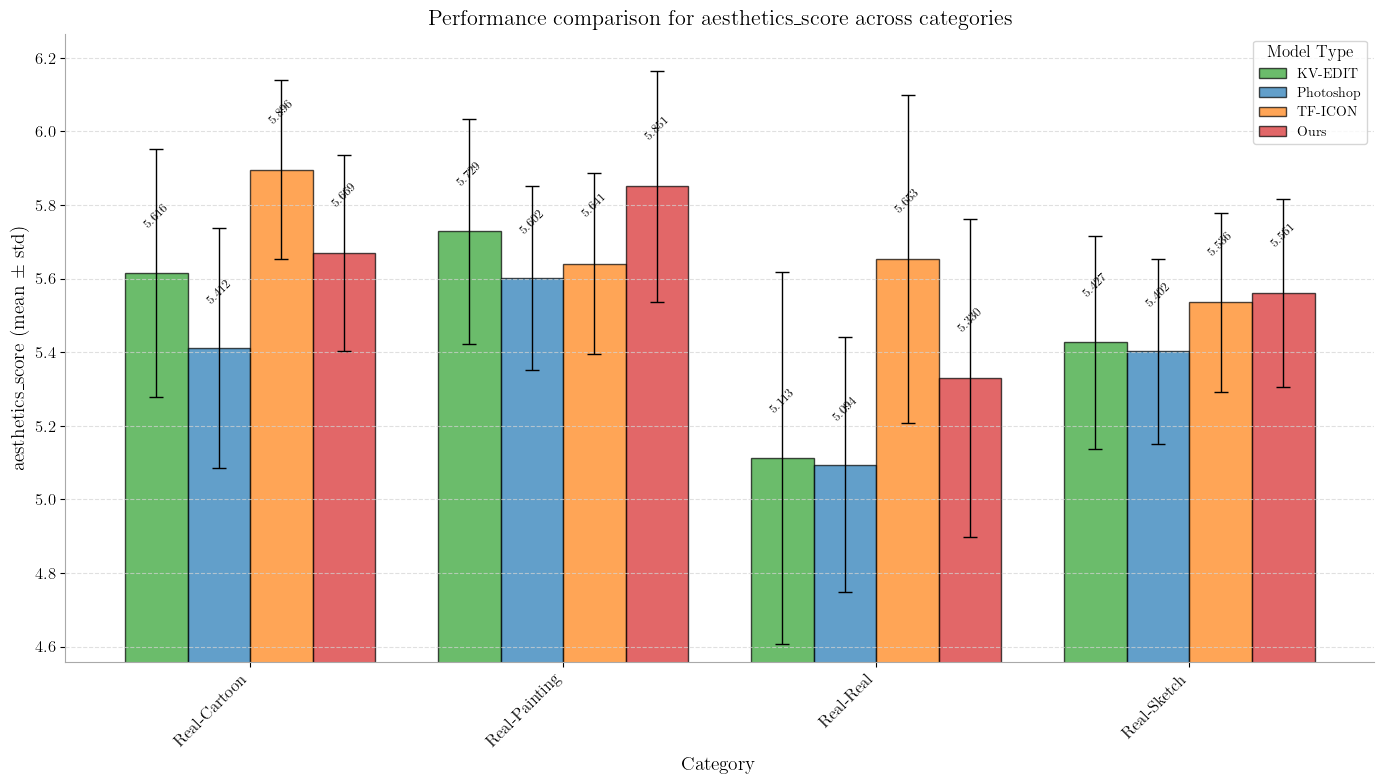

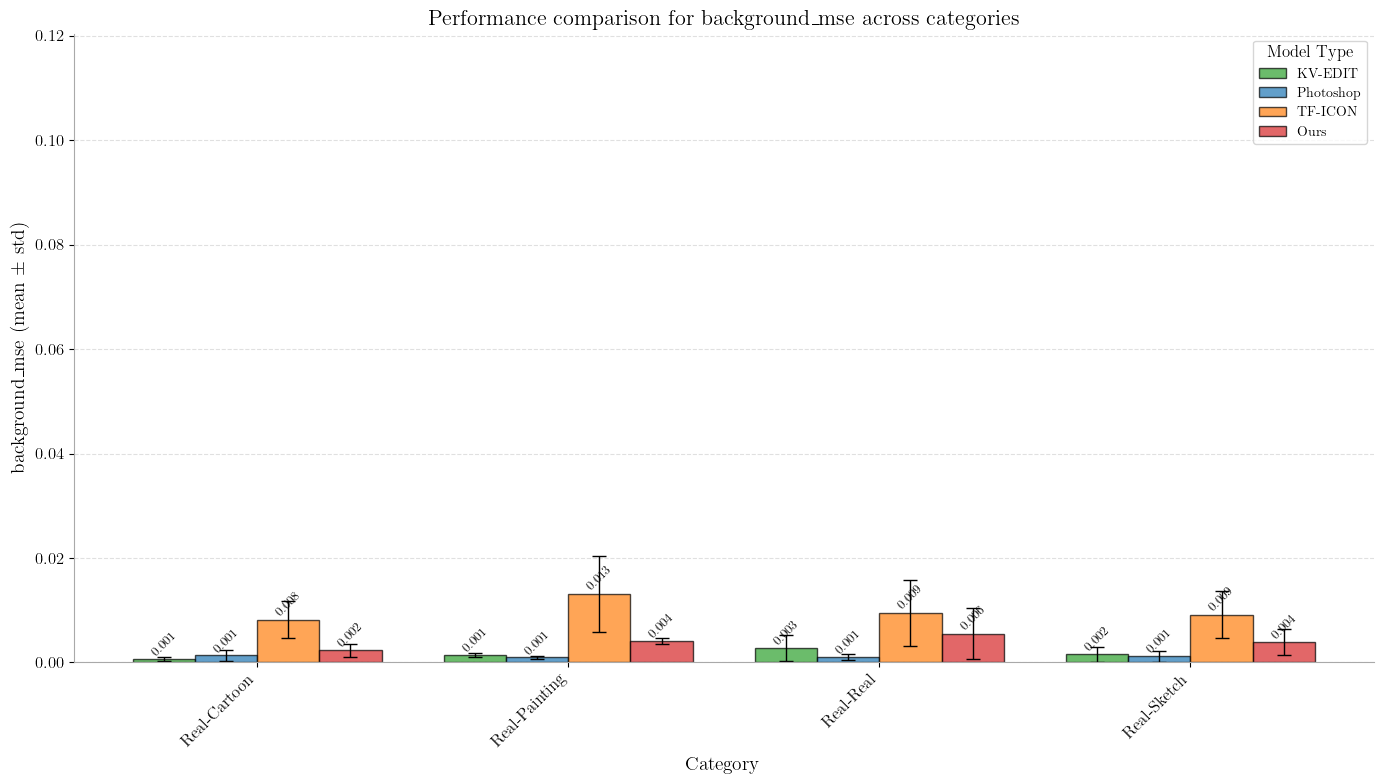

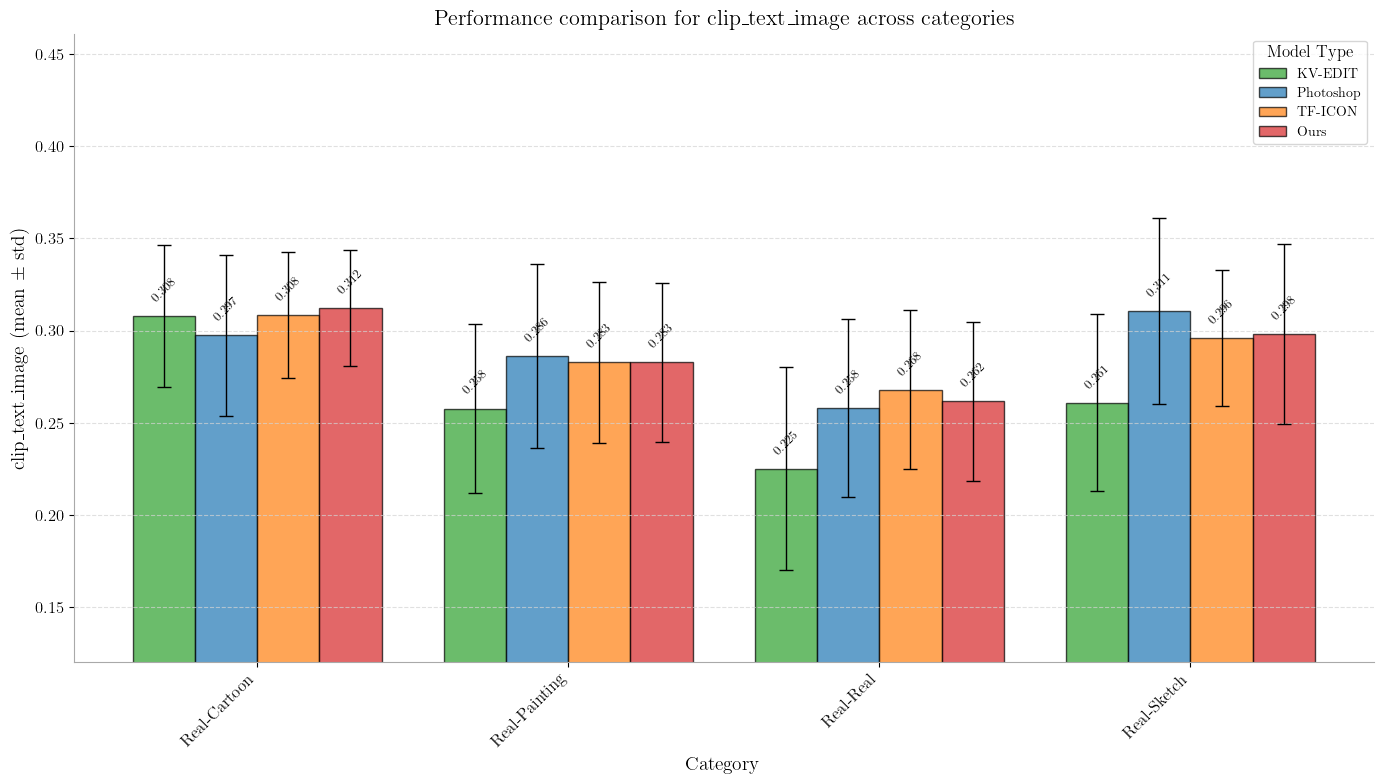

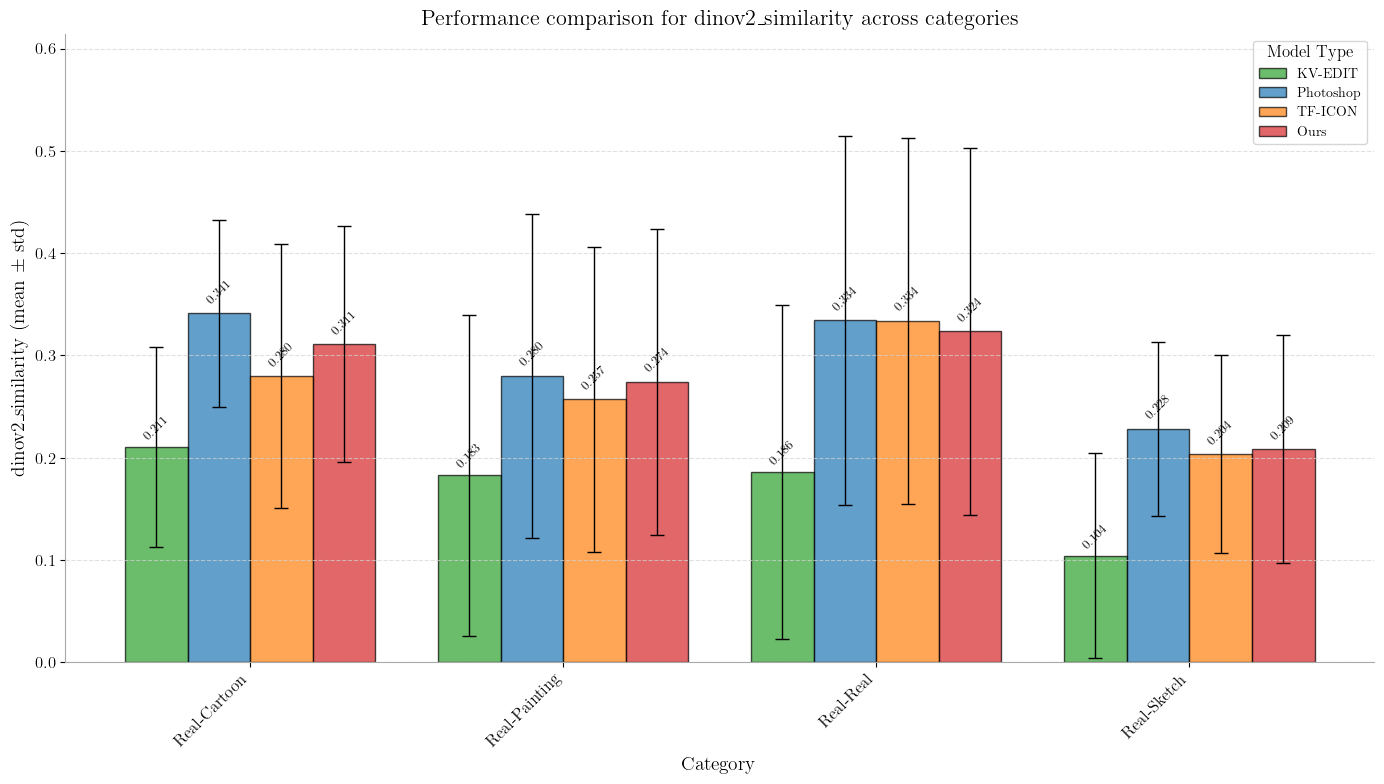

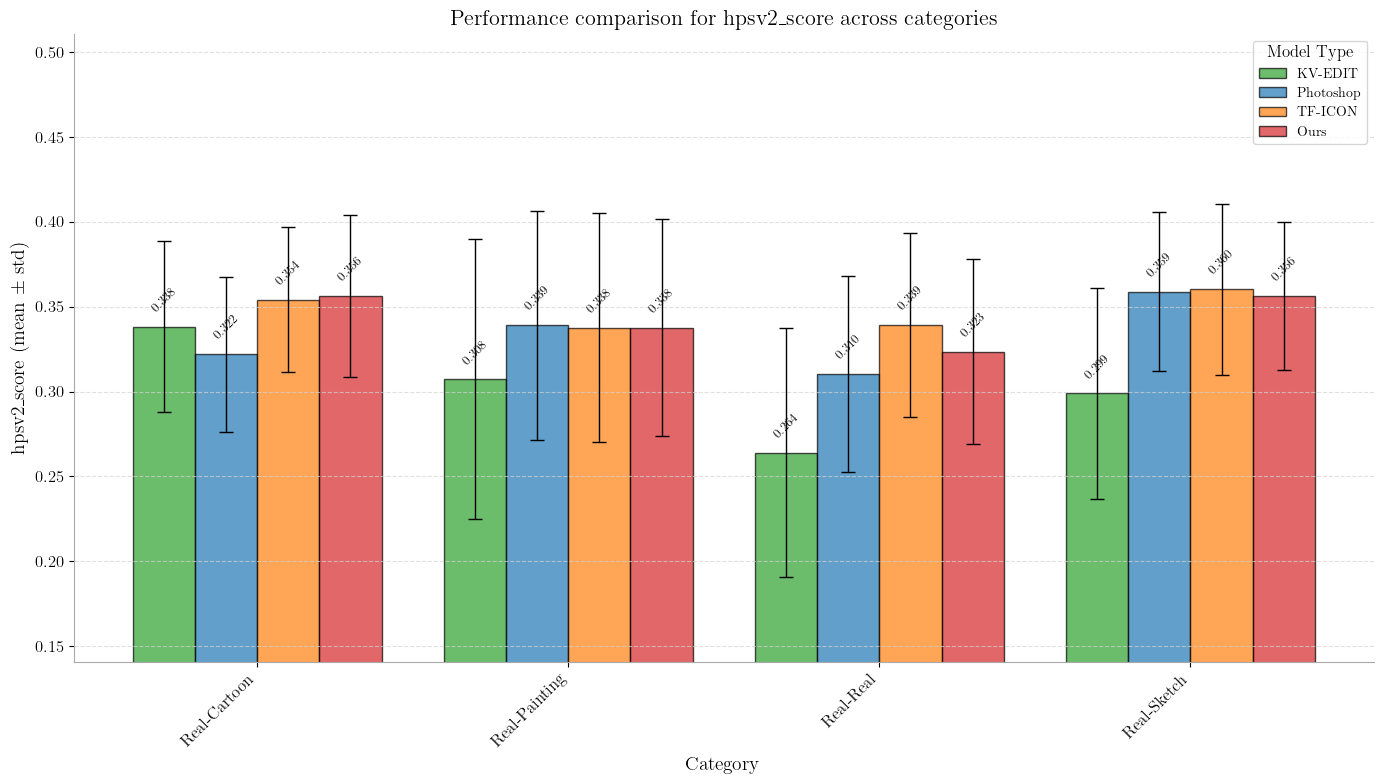

In [21]:
def plot_category_performance(mean_std_table, metric, figsize=(14, 8)):
    """
    Plot mean ± std performance for a specific metric across categories.
    
    Parameters:
    -----------
    mean_std_table : pandas.DataFrame
        DataFrame containing 'metric', 'model_type', 'category', 'mean', and 'std' columns
    metric : str
        The metric to plot
    figsize : tuple, optional
        Figure size in inches. Default is (14, 8)
    
    Returns:
    --------
    fig : matplotlib.figure.Figure
        The created figure
    """
    # Filter the data for the specified metric
    metric_data = mean_std_table[mean_std_table['metric'] == metric].copy()
    
    # Define model colors and markers for consistency
    model_styles = {
        'Photoshop': {'color': '#1f77b4', 'marker': 'o', 'label': 'Photoshop'},
        'TF-ICON': {'color': '#ff7f0e', 'marker': 's', 'label': 'TF-ICON'},
        'KV-EDIT': {'color': '#2ca02c', 'marker': '^', 'label': 'KV-EDIT'},
        'ours': {'color': '#d62728', 'marker': 'D', 'label': 'Ours'}
    }
    
    # Get all categories
    categories = metric_data['category'].unique()
    
    # Create the figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Set positions for the bars
    x = np.arange(len(categories))
    width = 0.2  # width of the bars
    offsets = [-1.5*width, -0.5*width, 0.5*width, 1.5*width]
    
    # Plot for each model type
    for i, model_type in enumerate(sorted(metric_data['model_type'].unique())):
        model_data = metric_data[metric_data['model_type'] == model_type]
        
        # For each category, find the corresponding mean and std
        means = []
        stds = []
        for category in categories:
            cat_data = model_data[model_data['category'] == category]
            if len(cat_data) > 0:
                means.append(cat_data['mean'].values[0])
                stds.append(cat_data['std'].values[0])
            else:
                means.append(0)
                stds.append(0)
        
        style = model_styles.get(model_type, {'color': f'C{i}', 'marker': 'o', 'label': model_type})
        
        # Plot bars with error bars
        bars = ax.bar(x + offsets[i], means, width, label=style['label'], 
                     color=style['color'], alpha=0.7, edgecolor='black', linewidth=1)
        
        # Add error bars
        ax.errorbar(x + offsets[i], means, yerr=stds, fmt='none', ecolor='black', 
                   capsize=5, capthick=1, elinewidth=1)
        
        # Add mean values on top of bars
        for j, (bar, mean) in enumerate(zip(bars, means)):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02*max(means),
                   f'{mean:.3f}', ha='center', va='bottom', fontsize=9, rotation=45)
    
    # Customize the plot
    ax.set_xlabel('Category', fontsize=14)
    ax.set_ylabel(f'{metric} (mean ± std)', fontsize=14)
    ax.set_title(f'Performance comparison for {metric} across categories', fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=45, ha='right')
    ax.legend(title='Model Type', title_fontsize=12, fontsize=10, loc='best')
    
    # Add grid for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Set y-axis to start at 0 or slightly below the minimum value if appropriate
    y_min = max(0, min([m-s for m,s in zip(metric_data['mean'], metric_data['std'])]) - 0.05)
    y_max = max([m+s for m,s in zip(metric_data['mean'], metric_data['std'])]) + 0.1
    ax.set_ylim(y_min, y_max)
    
    # Add a horizontal line at y=0 if the axis includes negative values
    if y_min < 0:
        ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    
    return fig

# Example usage for each metric
for metric in mean_std_table['metric'].unique():
    plot_category_performance(mean_std_table, metric)
    plt.show()

Barchart disaggregated

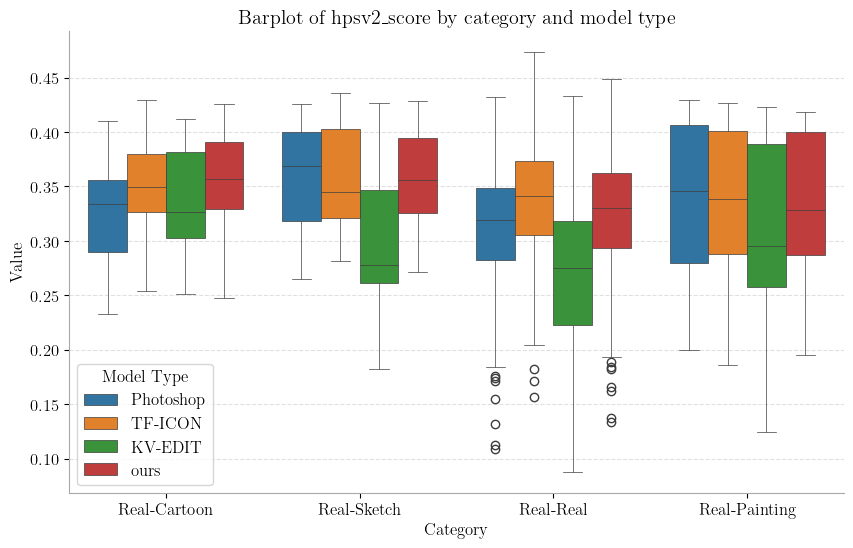

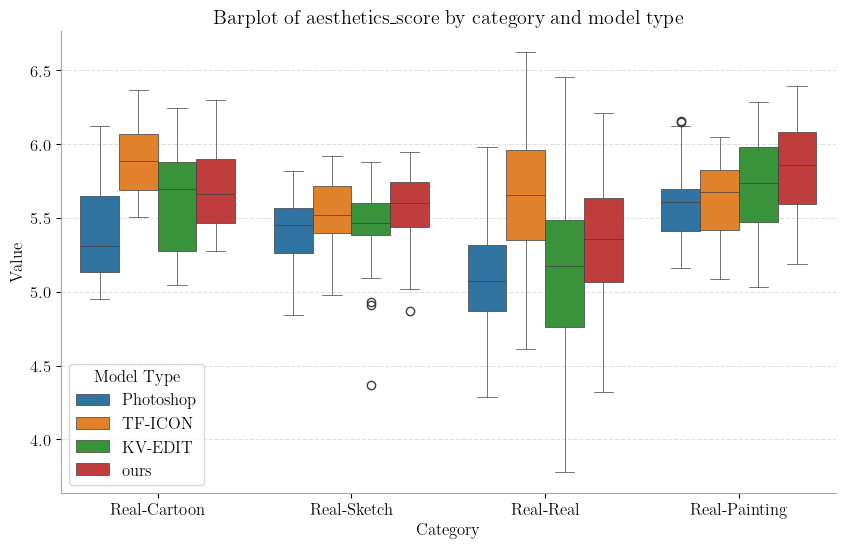

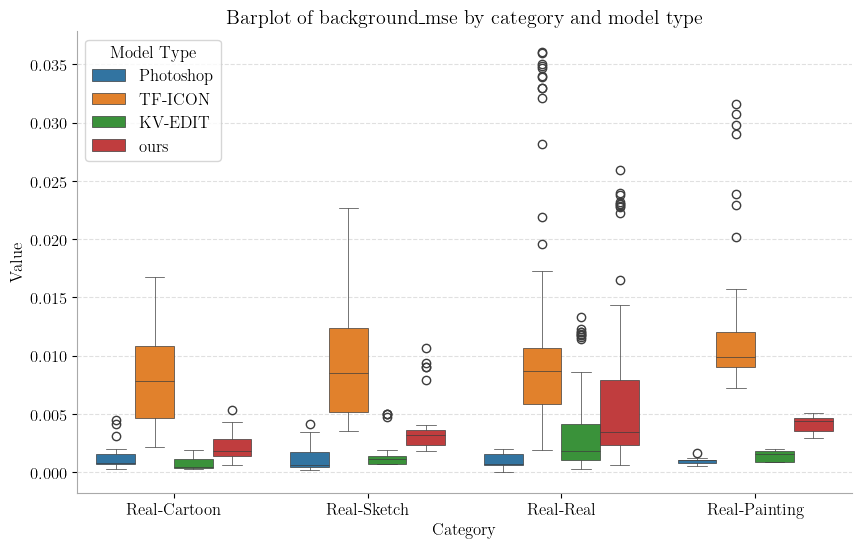

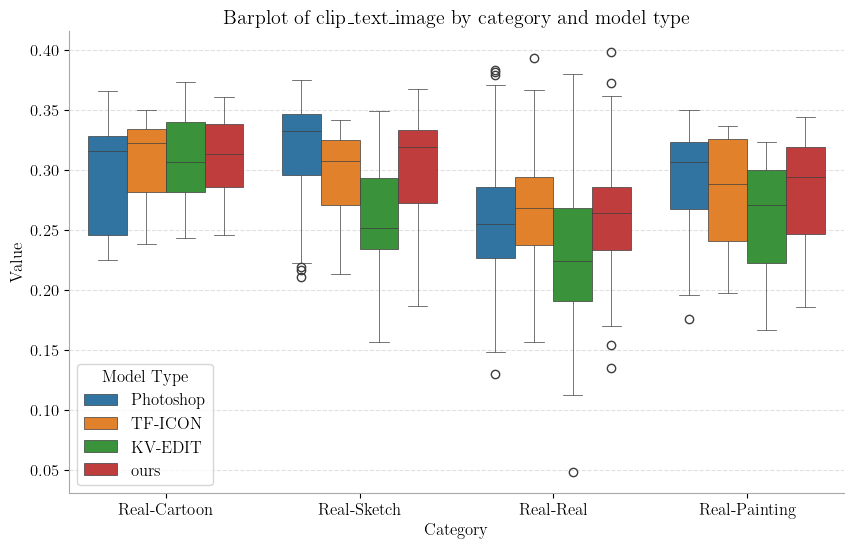

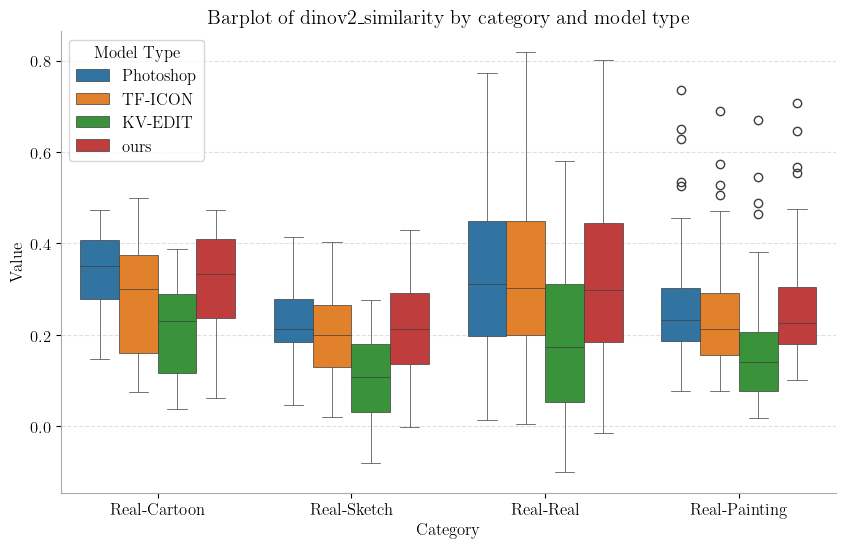

In [16]:
# make a barchart with hue=model_type, y = metric and x = category for each metric seperately

def plot_metric_chart(scores_flat, metric, type='boxplot'):
    plt.figure(figsize=(10, 6))
    if type == 'boxplot':
        sns.boxplot(data=scores_flat[scores_flat['metric'] == metric], 
                    x='category', y='value', hue='model_type',
                    dodge=True, linewidth=0.5)
    elif type == 'barplot':
        sns.barplot(data=scores_flat[scores_flat['metric'] == metric], 
                    x='category', y='value', hue='model_type',
                    dodge=True, linewidth=0.5)

    plt.title(f'Barplot of {metric} by category and model type')
    plt.ylabel('Value')
    plt.xlabel('Category')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Model Type')
    # plt.savefig(f'barchart_{metric}.pdf')
    plt.show()


# Plot each metric separately
for metric in scores_flat['metric'].unique():
    plot_metric_chart(scores_flat, metric)

same but as barchart

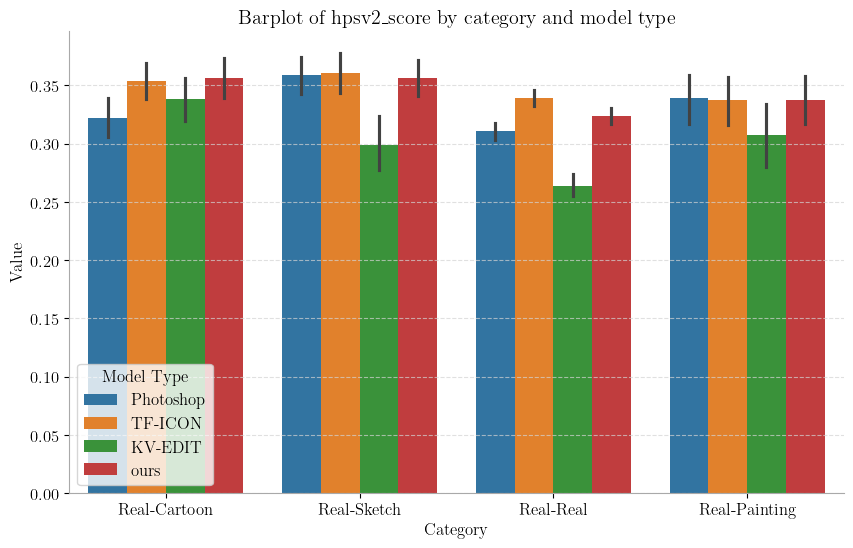

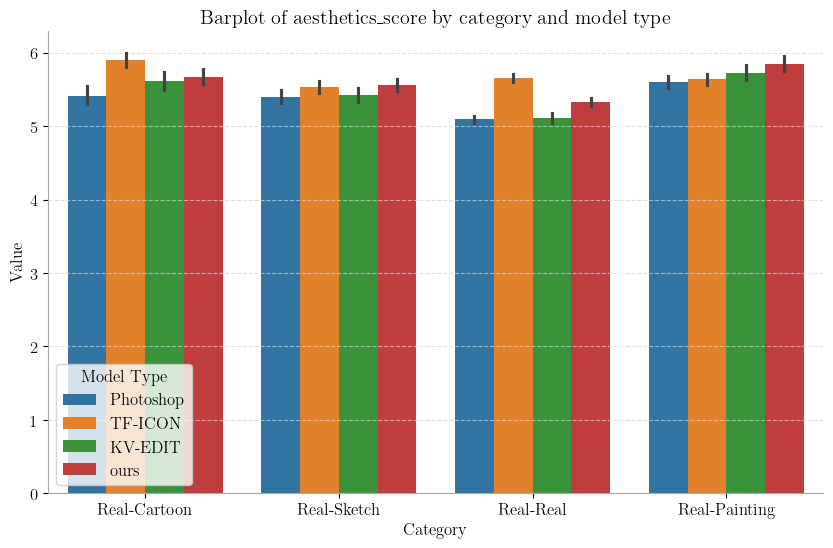

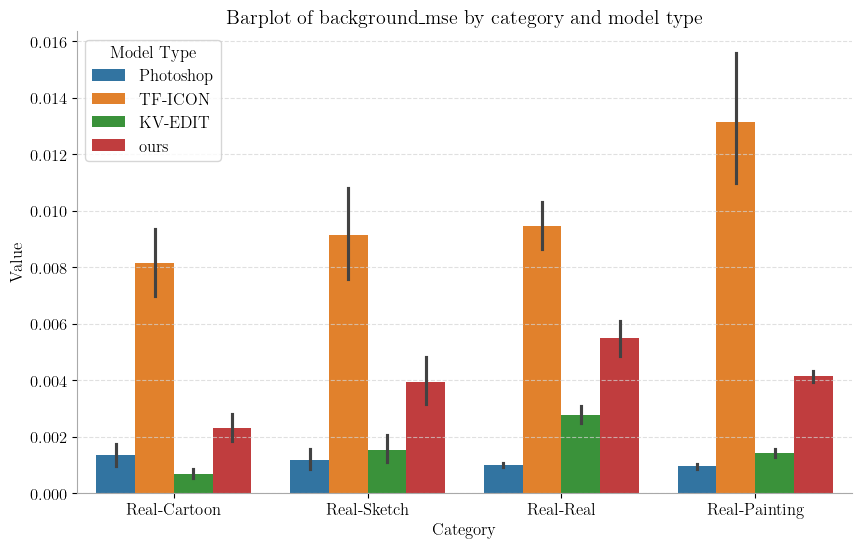

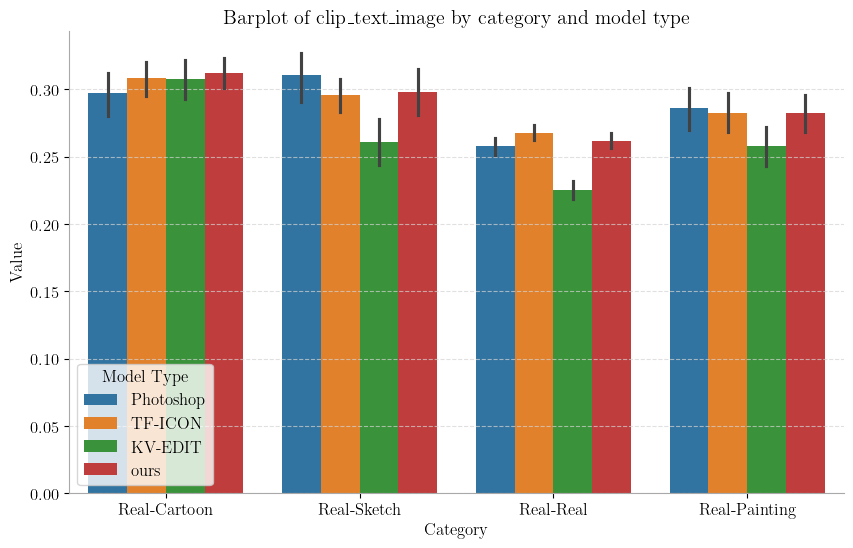

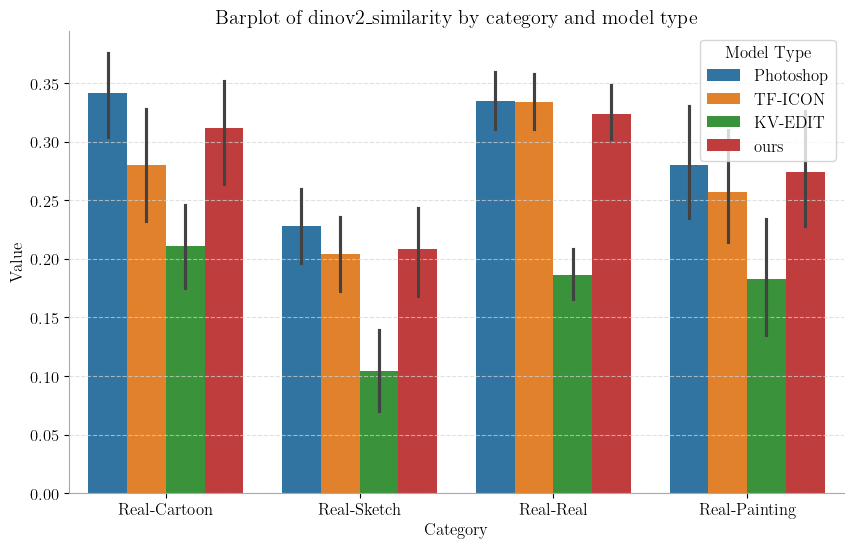

In [20]:
# Plot each metric separately
for metric in scores_flat['metric'].unique():
    plot_metric_chart(scores_flat, metric, type='barplot')

In [18]:
def create_comparison_grid(foreground, background, naive_result, tficon_result, kvedit_result, 
                          other_result1, other_result2, titles=None, save_path=None, figsize=(18, 10)):
    """
    Creates a publication-ready figure showing multiple image editing results side by side.
    
    Parameters:
    -----------
    foreground : PIL.Image or numpy.ndarray
        Foreground image already loaded
    background : PIL.Image or numpy.ndarray
        Background image already loaded
    naive_result : PIL.Image or numpy.ndarray
        Naive composite result already loaded
    tficon_result : PIL.Image or numpy.ndarray
        TF-ICON result already loaded
    kvedit_result : PIL.Image or numpy.ndarray
        KV-Edit result already loaded
    other_result1 : PIL.Image or numpy.ndarray
        First additional result already loaded
    other_result2 : PIL.Image or numpy.ndarray
        Second additional result already loaded
    titles : list, optional
        List of 7 titles for each subplot. If None, default titles are used.
    save_path : str, optional
        Path to save the figure. If None, figure is only displayed.
    figsize : tuple, optional
        Figure size in inches. Default is (18, 10).
        
    Returns:
    --------
    fig : matplotlib.figure.Figure
        The created figure
    """
    # Default titles if none provided
    if titles is None:
        titles = ['Foreground', 'Background', 'Naive Composite', 
                 'TF-ICON', 'KV-Edit', 'Method 1', 'Method 2']
    
    # Helper function to convert PIL Images to numpy arrays if needed
    def convert_image(img):
        if hasattr(img, 'convert'):  # Check if it's a PIL Image
            return np.array(img)
        return img  # Already a numpy array
    
    # Convert all images to numpy arrays if they are PIL Images
    images = [convert_image(img) for img in [foreground, background, naive_result, 
                                           tficon_result, kvedit_result, 
                                           other_result1, other_result2]]
    
    # Create figure
    fig, axes = plt.subplots(2, 4, figsize=figsize)
    axes = axes.flatten()
    
    # Hide the last subplot (since we only need 7)
    axes[-1].axis('off')
    
    # Plot images with titles
    for i, (img, title) in enumerate(zip(images, titles)):
        axes[i].imshow(img)
        axes[i].set_title(title, fontsize=14)
        axes[i].axis('off')
    
    # Add a main title with some context
    fig.suptitle('Comparison of Image Harmonization Methods', fontsize=16, y=0.98)
    
    # Add a subtle text description at the bottom
    fig.text(0.5, 0.02, 
             'Foreground object composited onto background using different harmonization techniques', 
             ha='center', fontsize=12, fontstyle='italic')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.93, bottom=0.07)
    
    # Save if path provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=300)
        print(f"Figure saved to {save_path}")
    
    return fig